In [1]:
import torch
print(torch.cuda.is_available())		 # 查看GPu设备是否可用
print(torch.cuda.device_count()) 		 # 查看GPu设备数量
print(torch.cuda.get_device_name())   	 # 查看当前GPu设备名称，默认设备id从0开始
print(torch.cuda.current_device())

True
3
NVIDIA RTX A6000
0


In [13]:
import pandas as pd
df = pd.read_csv('/ssd1/muntasir/Desktop/AutoTimes/dataset/EPS/df_merged.csv')

In [14]:
df

,DATE,PERMNO,earning_surprise,actual,mean,std,gvkey,ticker,capital_ratio,equity_invcap,...,debt_at,debt_capital,bm,CAPEI,evm,pe_exi,pe_inc,pe_op_basic,ps,ptb
0,1990-03,10026.0,-1.782160,0.0100,0.040000,0.016833,12825.0,JJSF,0.743945,0.245675,...,0.769517,0.733542,0.237223,0.343678,0.104742,0.015073,0.016134,0.007815,0.149758,0.179795
1,1990-06,10026.0,-0.607986,0.0650,0.081000,0.026315,12825.0,JJSF,0.425606,0.560554,...,0.498141,0.489028,0.447445,0.289091,0.106389,0.016763,0.017943,0.037037,0.130757,0.157540
2,1990-09,10026.0,-2.161522,0.1000,0.122500,0.010408,12825.0,JJSF,0.415225,0.574394,...,0.486989,0.495298,0.494696,0.101030,0.091990,0.012918,0.013827,0.029010,0.055072,0.048316
3,1990-12,10026.0,2.597177,0.0700,0.062500,0.002887,12825.0,JJSF,0.359862,0.629758,...,0.401487,0.592476,0.795564,0.162989,0.030487,0.026191,0.028035,0.056475,0.100483,0.116545
4,1991-03,10026.0,NaN,NaN,NaN,NaN,NaN,NaN,0.415225,0.574394,...,0.464684,0.551724,0.584378,0.416283,0.036230,0.037627,0.040276,0.030859,0.190016,0.272914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132155,2020-12,93436.0,-0.858278,0.2667,0.355900,0.103928,184996.0,TSLA,0.574468,0.922031,...,0.703704,0.567616,0.161290,0.379009,0.218706,0.937244,0.937244,0.816659,0.709881,0.869912
1132156,2021-03,93436.0,1.054453,0.3100,0.248168,0.058638,184996.0,TSLA,0.285106,0.961303,...,0.372840,0.243772,0.112903,0.347179,0.272161,0.928803,0.912446,0.992077,0.595355,0.535953
1132157,2021-06,93436.0,1.508901,0.4833,0.320422,0.107944,184996.0,TSLA,0.364539,0.950192,...,0.479012,0.343416,0.137097,0.351347,0.246725,0.681774,0.681774,0.654319,0.539223,0.539192
1132158,2021-09,93436.0,0.901945,0.6200,0.535452,0.093738,184996.0,TSLA,0.285106,0.960920,...,0.365432,0.256228,0.145161,0.279661,0.248609,0.580909,0.580909,0.606642,0.538877,0.599352


In [15]:
df.columns

Index(['DATE', 'PERMNO', 'earning_surprise', 'actual', 'mean', 'std', 'gvkey',
       'ticker', 'capital_ratio', 'equity_invcap', 'debt_invcap',
       'totdebt_invcap', 'at_turn', 'pay_turn', 'rect_turn', 'sale_equity',
       'sale_invcap', 'invt_act', 'rect_act', 'ocf_lct', 'cash_debt',
       'cash_lt', 'cfm', 'short_debt', 'profit_lct', 'curr_debt',
       'debt_ebitda', 'dltt_be', 'lt_debt', 'lt_ppent', 'cash_ratio',
       'curr_ratio', 'quick_ratio', 'accrual', 'rd_sale', 'adv_sale',
       'staff_sale', 'GProf', 'aftret_eq', 'aftret_equity', 'aftret_invcapx',
       'gpm', 'npm', 'opmad', 'opmbd', 'pretret_earnat', 'pretret_noa', 'ptpm',
       'roa', 'roce', 'roe', 'de_ratio', 'debt_assets', 'debt_at',
       'debt_capital', 'bm', 'CAPEI', 'evm', 'pe_exi', 'pe_inc', 'pe_op_basic',
       'ps', 'ptb'],
      dtype='object')

In [16]:
df.drop(columns=['earning_surprise'], inplace=True)

In [17]:
df.drop(columns=['gvkey', 'ticker'], inplace=True)

In [18]:
df

,DATE,PERMNO,actual,mean,std,capital_ratio,equity_invcap,debt_invcap,totdebt_invcap,at_turn,...,debt_at,debt_capital,bm,CAPEI,evm,pe_exi,pe_inc,pe_op_basic,ps,ptb
0,1990-03,10026.0,0.0100,0.040000,0.016833,0.743945,0.245675,0.740484,0.744118,0.551724,...,0.769517,0.733542,0.237223,0.343678,0.104742,0.015073,0.016134,0.007815,0.149758,0.179795
1,1990-06,10026.0,0.0650,0.081000,0.026315,0.425606,0.560554,0.425606,0.482353,0.559387,...,0.498141,0.489028,0.447445,0.289091,0.106389,0.016763,0.017943,0.037037,0.130757,0.157540
2,1990-09,10026.0,0.1000,0.122500,0.010408,0.415225,0.574394,0.411765,0.476471,0.610473,...,0.486989,0.495298,0.494696,0.101030,0.091990,0.012918,0.013827,0.029010,0.055072,0.048316
3,1990-12,10026.0,0.0700,0.062500,0.002887,0.359862,0.629758,0.359862,0.423529,0.573436,...,0.401487,0.592476,0.795564,0.162989,0.030487,0.026191,0.028035,0.056475,0.100483,0.116545
4,1991-03,10026.0,NaN,NaN,NaN,0.415225,0.574394,0.415225,0.470588,0.609195,...,0.464684,0.551724,0.584378,0.416283,0.036230,0.037627,0.040276,0.030859,0.190016,0.272914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132155,2020-12,93436.0,0.2667,0.355900,0.103928,0.574468,0.922031,0.530324,0.607050,0.562698,...,0.703704,0.567616,0.161290,0.379009,0.218706,0.937244,0.937244,0.816659,0.709881,0.869912
1132156,2021-03,93436.0,0.3100,0.248168,0.058638,0.285106,0.961303,0.269394,0.280679,0.567966,...,0.372840,0.243772,0.112903,0.347179,0.272161,0.928803,0.912446,0.992077,0.595355,0.535953
1132157,2021-06,93436.0,0.4833,0.320422,0.107944,0.364539,0.950192,0.341326,0.383812,0.600632,...,0.479012,0.343416,0.137097,0.351347,0.246725,0.681774,0.681774,0.654319,0.539223,0.539192
1132158,2021-09,93436.0,0.6200,0.535452,0.093738,0.285106,0.960920,0.269394,0.284595,0.655427,...,0.365432,0.256228,0.145161,0.279661,0.248609,0.580909,0.580909,0.606642,0.538877,0.599352


In [19]:
df.columns

Index(['DATE', 'PERMNO', 'actual', 'mean', 'std', 'capital_ratio',
       'equity_invcap', 'debt_invcap', 'totdebt_invcap', 'at_turn', 'pay_turn',
       'rect_turn', 'sale_equity', 'sale_invcap', 'invt_act', 'rect_act',
       'ocf_lct', 'cash_debt', 'cash_lt', 'cfm', 'short_debt', 'profit_lct',
       'curr_debt', 'debt_ebitda', 'dltt_be', 'lt_debt', 'lt_ppent',
       'cash_ratio', 'curr_ratio', 'quick_ratio', 'accrual', 'rd_sale',
       'adv_sale', 'staff_sale', 'GProf', 'aftret_eq', 'aftret_equity',
       'aftret_invcapx', 'gpm', 'npm', 'opmad', 'opmbd', 'pretret_earnat',
       'pretret_noa', 'ptpm', 'roa', 'roce', 'roe', 'de_ratio', 'debt_assets',
       'debt_at', 'debt_capital', 'bm', 'CAPEI', 'evm', 'pe_exi', 'pe_inc',
       'pe_op_basic', 'ps', 'ptb'],
      dtype='object')

In [20]:
df['actual'] = df.pop('actual') 

In [21]:
df

,DATE,PERMNO,mean,std,capital_ratio,equity_invcap,debt_invcap,totdebt_invcap,at_turn,pay_turn,...,debt_capital,bm,CAPEI,evm,pe_exi,pe_inc,pe_op_basic,ps,ptb,actual
0,1990-03,10026.0,0.040000,0.016833,0.743945,0.245675,0.740484,0.744118,0.551724,0.346962,...,0.733542,0.237223,0.343678,0.104742,0.015073,0.016134,0.007815,0.149758,0.179795,0.0100
1,1990-06,10026.0,0.081000,0.026315,0.425606,0.560554,0.425606,0.482353,0.559387,0.384028,...,0.489028,0.447445,0.289091,0.106389,0.016763,0.017943,0.037037,0.130757,0.157540,0.0650
2,1990-09,10026.0,0.122500,0.010408,0.415225,0.574394,0.411765,0.476471,0.610473,0.375915,...,0.495298,0.494696,0.101030,0.091990,0.012918,0.013827,0.029010,0.055072,0.048316,0.1000
3,1990-12,10026.0,0.062500,0.002887,0.359862,0.629758,0.359862,0.423529,0.573436,0.113108,...,0.592476,0.795564,0.162989,0.030487,0.026191,0.028035,0.056475,0.100483,0.116545,0.0700
4,1991-03,10026.0,NaN,NaN,0.415225,0.574394,0.415225,0.470588,0.609195,0.093064,...,0.551724,0.584378,0.416283,0.036230,0.037627,0.040276,0.030859,0.190016,0.272914,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132155,2020-12,93436.0,0.355900,0.103928,0.574468,0.922031,0.530324,0.607050,0.562698,0.236732,...,0.567616,0.161290,0.379009,0.218706,0.937244,0.937244,0.816659,0.709881,0.869912,0.2667
1132156,2021-03,93436.0,0.248168,0.058638,0.285106,0.961303,0.269394,0.280679,0.567966,0.212871,...,0.243772,0.112903,0.347179,0.272161,0.928803,0.912446,0.992077,0.595355,0.535953,0.3100
1132157,2021-06,93436.0,0.320422,0.107944,0.364539,0.950192,0.341326,0.383812,0.600632,0.220246,...,0.343416,0.137097,0.351347,0.246725,0.681774,0.681774,0.654319,0.539223,0.539192,0.4833
1132158,2021-09,93436.0,0.535452,0.093738,0.285106,0.960920,0.269394,0.284595,0.655427,0.229501,...,0.256228,0.145161,0.279661,0.248609,0.580909,0.580909,0.606642,0.538877,0.599352,0.6200


In [22]:
df.to_csv('/ssd1/muntasir/Desktop/AutoTimes/dataset/panel/panel.csv', index=False)

In [12]:
import pandas as pd

# Sample DataFrame
data = {'col1': [1, 2, 3], 'col2': [4, 5, 6], 'col3': [7, 8, 9]}
df = pd.DataFrame(data)

# Move 'col1' to the last position
df['col1'] = df.pop('col1') 

print(df)

   col2  col3  col1
0     4     7     1
1     5     8     2
2     6     9     3


In [ ]:
df = df[~df['actual'].isna()]

In [ ]:
df['PERMNO'].value_counts().sort_values(ascending=False).head(10)

In [ ]:
df[df['PERMNO'] == 47941.0]['actual'].hist(bins=100)

In [ ]:
sample = df[df['PERMNO'] == 47941.0]

In [ ]:
sample

In [ ]:
sample.columns

In [ ]:
sample = sample.sort_values(by="DATE")
drop_cols = ["PERMNO", "gvkey", "ticker",'earning_surprise','mean','std']
sample = sample.drop(columns=drop_cols)



# Move 'actual' to the end
target = sample.pop("actual")
sample["actual"] = target

# Rename 'DATE' to 'date'
sample = sample.rename(columns={"DATE": "date"})


In [ ]:
sample.columns

In [ ]:
sample['date']

In [ ]:
sample.to_csv('/ssd1/muntasir/Desktop/AutoTimes/dataset/EPS/permno10000.csv', index=False)

In [ ]:
sample

In [2]:

import os
import random
import numpy as np
import torch
from exp.exp_long_term_forecasting import Exp_Long_Term_Forecast
from utils.tools import dotdict
fix_seed = 2021
random.seed(fix_seed)
torch.manual_seed(fix_seed)
np.random.seed(fix_seed)

args = dotdict()
args.root_path = './dataset/ETT-small/'
args.data_path ='ETTh1.csv' 
args.model_id='ETTh1_672_96'
args.model = 'AutoTimes_Llama'
args.data = 'ETTh1'
args.features = 'M'
args.seq_len = 672
args.label_len = 576
args.token_len = 96
args.test_seq_len = 672
args.test_label_len = 576
args.test_pred_len = 96
args.batch_size = 256
args.learning_rate = 0.0005
args.mlp_hidden_layers = 0
args.train_epochs = 10
args.use_amp = True
args.cosine = True
args.tmax = 10
args.mix_embeds = True
args.drop_last = True
args.checkpoints = './checkpoints/'
args.val_set_shuffle = True
args.seasonal_patterns = 'Monthly'
args.dropout = 0.1
args.llm_ckp_dir = '/ssd1/muntasir/Desktop/AutoTimes/llama-7b'
args.mlp_hidden_dim = 256
args.mlp_activation = 'tanh'
args.num_workers = 10
args.patience = 3
args.des = 'test'
args.loss = 'MSE'
args.lradj = 'type1'
args.weight_decay = 0
args.test_dir = './test'
args.test_file_name = 'checkpoint.pth'
args.gpu = 0
args.visualize = True
print('Args in experiment:')
print(args)

Args in experiment:
{'root_path': './dataset/ETT-small/', 'data_path': 'ETTh1.csv', 'model_id': 'ETTh1_672_96', 'model': 'AutoTimes_Llama', 'data': 'ETTh1', 'features': 'M', 'seq_len': 672, 'label_len': 576, 'token_len': 96, 'test_seq_len': 672, 'test_label_len': 576, 'test_pred_len': 96, 'batch_size': 256, 'learning_rate': 0.0005, 'mlp_hidden_layers': 0, 'train_epochs': 10, 'use_amp': True, 'cosine': True, 'tmax': 10, 'mix_embeds': True, 'drop_last': True, 'checkpoints': './checkpoints/', 'val_set_shuffle': True, 'seasonal_patterns': 'Monthly', 'dropout': 0.1, 'llm_ckp_dir': '/ssd1/muntasir/Desktop/AutoTimes/llama-7b', 'mlp_hidden_dim': 256, 'mlp_activation': 'tanh', 'num_workers': 10, 'patience': 3, 'des': 'test', 'loss': 'MSE', 'lradj': 'type1', 'weight_decay': 0, 'test_dir': './test', 'test_file_name': 'checkpoint.pth', 'gpu': 0, 'visualize': True}


In [3]:

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
exp = Exp_Long_Term_Forecast(args)
# setting record of experiments
setting = '{}_{}_{}_sl{}_ll{}_tl{}_lr{}_bt{}_wd{}_hd{}_hl{}_cos{}_mix{}_{}'.format(
    args.model_id,
    args.model,
    args.data,
    args.seq_len,
    args.label_len,
    args.token_len,
    args.learning_rate,
    args.batch_size,
    args.weight_decay,
    args.mlp_hidden_dim,
    args.mlp_hidden_layers,
    args.cosine,
    args.mix_embeds,
    args.des)
print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
exp.train(setting)
print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
exp.test(setting)
torch.cuda.empty_cache()

cuda:0


Loading checkpoint shards: 100%|██████████| 2/2 [00:06<00:00,  3.06s/it]


use linear as tokenizer and detokenizer
>>>>>>>start training : ETTh1_672_96_AutoTimes_Llama_ETTh1_sl672_ll576_tl96_lr0.0005_bt256_wd0_hd256_hl0_cosTrue_mixTrue_test>>>>>>>>>>>>>>>>>>>>>>>>>>
train 55111
val 19495
test 19495
add_scale torch.float32 torch.Size([])
encoder.weight torch.float32 torch.Size([4096, 96])
encoder.bias torch.float32 torch.Size([4096])
decoder.weight torch.float32 torch.Size([96, 4096])
decoder.bias torch.float32 torch.Size([96])
next learning rate is 0.0005
	iters: 100, epoch: 1 | loss: 0.3188635
	speed: 0.7826s/iter; left time: 1605.0282s
	iters: 200, epoch: 1 | loss: 0.3097884
	speed: 0.7757s/iter; left time: 1513.3763s
Epoch: 1 cost time: 167.9520082473755
Epoch: 1, Steps: 215 | Train Loss: 0.3578734 Vali Loss: 0.5867180 Test Loss: 0.3771174
Validation loss decreased (inf --> 0.586718).
lr = 0.0004877644
	iters: 100, epoch: 2 | loss: 0.3017199
	speed: 1.5408s/iter; left time: 2828.9764s
	iters: 200, epoch: 2 | loss: 0.3293016
	speed: 0.7947s/iter; left time:

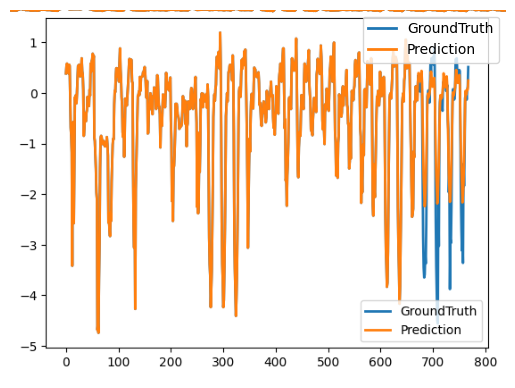

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
img = Image.open('test_results/ETTh1_672_96_AutoTimes_Llama_ETTh1_sl672_ll576_tl96_lr0.0005_bt256_wd0_hd256_hl0_cosTrue_mixTrue_test/96/0.png')
# 使用matplotlib显示图片
plt.imshow(img)
plt.axis('off') 
plt.show()

In [3]:
import pandas as pd
df = pd.read_csv('/ssd1/muntasir/Desktop/AutoTimes/dataset/custom/permno10000.csv')

In [4]:
df

,date,capital_ratio,equity_invcap,debt_invcap,totdebt_invcap,at_turn,pay_turn,rect_turn,sale_equity,sale_invcap,...,debt_capital,bm,CAPEI,evm,pe_exi,pe_inc,pe_op_basic,ps,ptb,actual
0,1990-03,0.171930,0.829268,0.175943,0.172474,0.859975,0.275389,0.847491,0.172131,0.758794,...,0.171004,0.055718,0.875307,0.448659,0.593454,0.389562,0.590786,0.413351,0.554440,0.235
1,1990-06,0.201754,0.799652,0.206463,0.200348,0.867410,0.270384,0.900830,0.179259,0.756281,...,0.208178,0.070870,0.866391,0.451278,0.573618,0.376541,0.240954,0.376939,0.508368,0.330
2,1990-09,0.180702,0.820557,0.184919,0.179443,0.858736,0.281726,0.911695,0.171597,0.749581,...,0.185874,0.083578,0.840205,0.443106,0.485027,0.318387,0.421214,0.296022,0.377830,0.250
3,1990-12,0.164912,0.836237,0.168761,0.163763,0.856258,0.292613,0.927104,0.168033,0.752094,...,0.167286,0.125611,0.854630,0.385687,0.557781,0.366145,0.504158,0.354012,0.460327,0.370
4,1991-03,0.128070,0.872822,0.131059,0.128920,0.830235,0.336746,0.800079,0.155203,0.738693,...,0.122677,0.096774,0.862070,0.362846,0.629223,0.413042,0.585607,0.406608,0.511715,0.160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,2020-12,0.868421,0.137631,0.885099,0.897213,0.190830,0.803614,0.354405,0.143621,0.134003,...,0.851301,0.340176,0.800740,0.452640,0.385878,0.253303,0.252079,0.238256,0.222682,1.160
124,2021-03,0.740351,0.263066,0.754039,0.735192,0.236679,0.768743,0.371395,0.112259,0.178392,...,0.719331,0.311828,0.810576,0.261002,0.355260,0.233204,0.250693,0.300967,0.279583,0.520
125,2021-06,0.791228,0.214286,0.806104,0.721254,0.244114,0.876117,0.443105,0.134890,0.179229,...,0.771375,0.213099,0.816050,0.269174,0.339999,0.223186,0.245951,0.295572,0.268754,0.500
126,2021-09,0.743860,0.259582,0.759425,0.722997,0.273854,0.901596,0.450217,0.128653,0.202680,...,0.723048,0.228250,0.817622,0.230511,0.313860,0.206028,0.221221,0.295572,0.270919,0.550


In [5]:
128-36

92